### Load track, stations & schedule into new Line instance

In [1]:
import json
import pandas as pd
from App.classes.Schedule import Schedule
from App.classes.Line import Line

track = json.load(open('shapefiles/gold_northbound/goldJSON.json'))
stations = json.load(open('misc/GoldLineStationIds.json'))['items']
full_schedule = pd.read_csv('GTFS/stop_times.csv')

gold_schedule = Schedule('08/29/18', '804', full_schedule)

gold = Line(804, track, stations, gold_schedule)
"DONE"

/home/cts/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/cts/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


'DONE'

In [2]:
gold_line_schedule = gold.getScheduleWithCoordinates()
gold_line_schedule.head()

datetime   trip_id arrival_time departure_time  stop_id  \
0 2018-08-29 09:42:00  46474735     09:42:00       09:42:00    80401   
1 2018-08-29 10:06:00  46474736     10:06:00       10:06:00    80401   
2 2018-08-29 10:30:00  46474737     10:30:00       10:30:00    80401   
3 2018-08-29 10:54:00  46474738     10:54:00       10:54:00    80401   
4 2018-08-29 11:18:00  46474739     11:18:00       11:18:00    80401   

  station_id      display_name         stop_headsign  relative_position  \
0          1  Atlantic Station  804 - Azusa / Citrus           0.002717   
1          1  Atlantic Station  804 - Azusa / Citrus           0.002717   
2          1  Atlantic Station  804 - Azusa / Citrus           0.002717   
3          1  Atlantic Station  804 - Azusa / Citrus           0.002717   
4          1  Atlantic Station  804 - Azusa / Citrus           0.002717   

                        geometry  
0  POINT (-118.15447 34.0333999)  
1  POINT (-118.15447 34.0333999)  
2  POINT (-118.15447 34.0333999)  
3  POINT (-118.15447 34.0333999)  
4  POINT (-118.15447 34.0333999)

In [3]:
from App.classes.Tracker import selectAnalysisWindow
start_date = '08/29/18 07:00:00'
end_date = '08/29/18 20:00:00'
analysis_window = selectAnalysisWindow(gold_line_schedule, start_date, end_date).reset_index()
analysis_window.head()

index            datetime   trip_id arrival_time departure_time  stop_id  \
0      0 2018-08-29 09:42:00  46474735     09:42:00       09:42:00    80401   
1      1 2018-08-29 10:06:00  46474736     10:06:00       10:06:00    80401   
2      2 2018-08-29 10:30:00  46474737     10:30:00       10:30:00    80401   
3      3 2018-08-29 10:54:00  46474738     10:54:00       10:54:00    80401   
4      4 2018-08-29 11:18:00  46474739     11:18:00       11:18:00    80401   

  station_id      display_name         stop_headsign  relative_position  \
0          1  Atlantic Station  804 - Azusa / Citrus           0.002717   
1          1  Atlantic Station  804 - Azusa / Citrus           0.002717   
2          1  Atlantic Station  804 - Azusa / Citrus           0.002717   
3          1  Atlantic Station  804 - Azusa / Citrus           0.002717   
4          1  Atlantic Station  804 - Azusa / Citrus           0.002717   

                        geometry  
0  POINT (-118.15447 34.0333999)  
1  POINT (-118.15447 34.0333999)  
2  POINT (-118.15447 34.0333999)  
3  POINT (-118.15447 34.0333999)  
4  POINT (-118.15447 34.0333999)

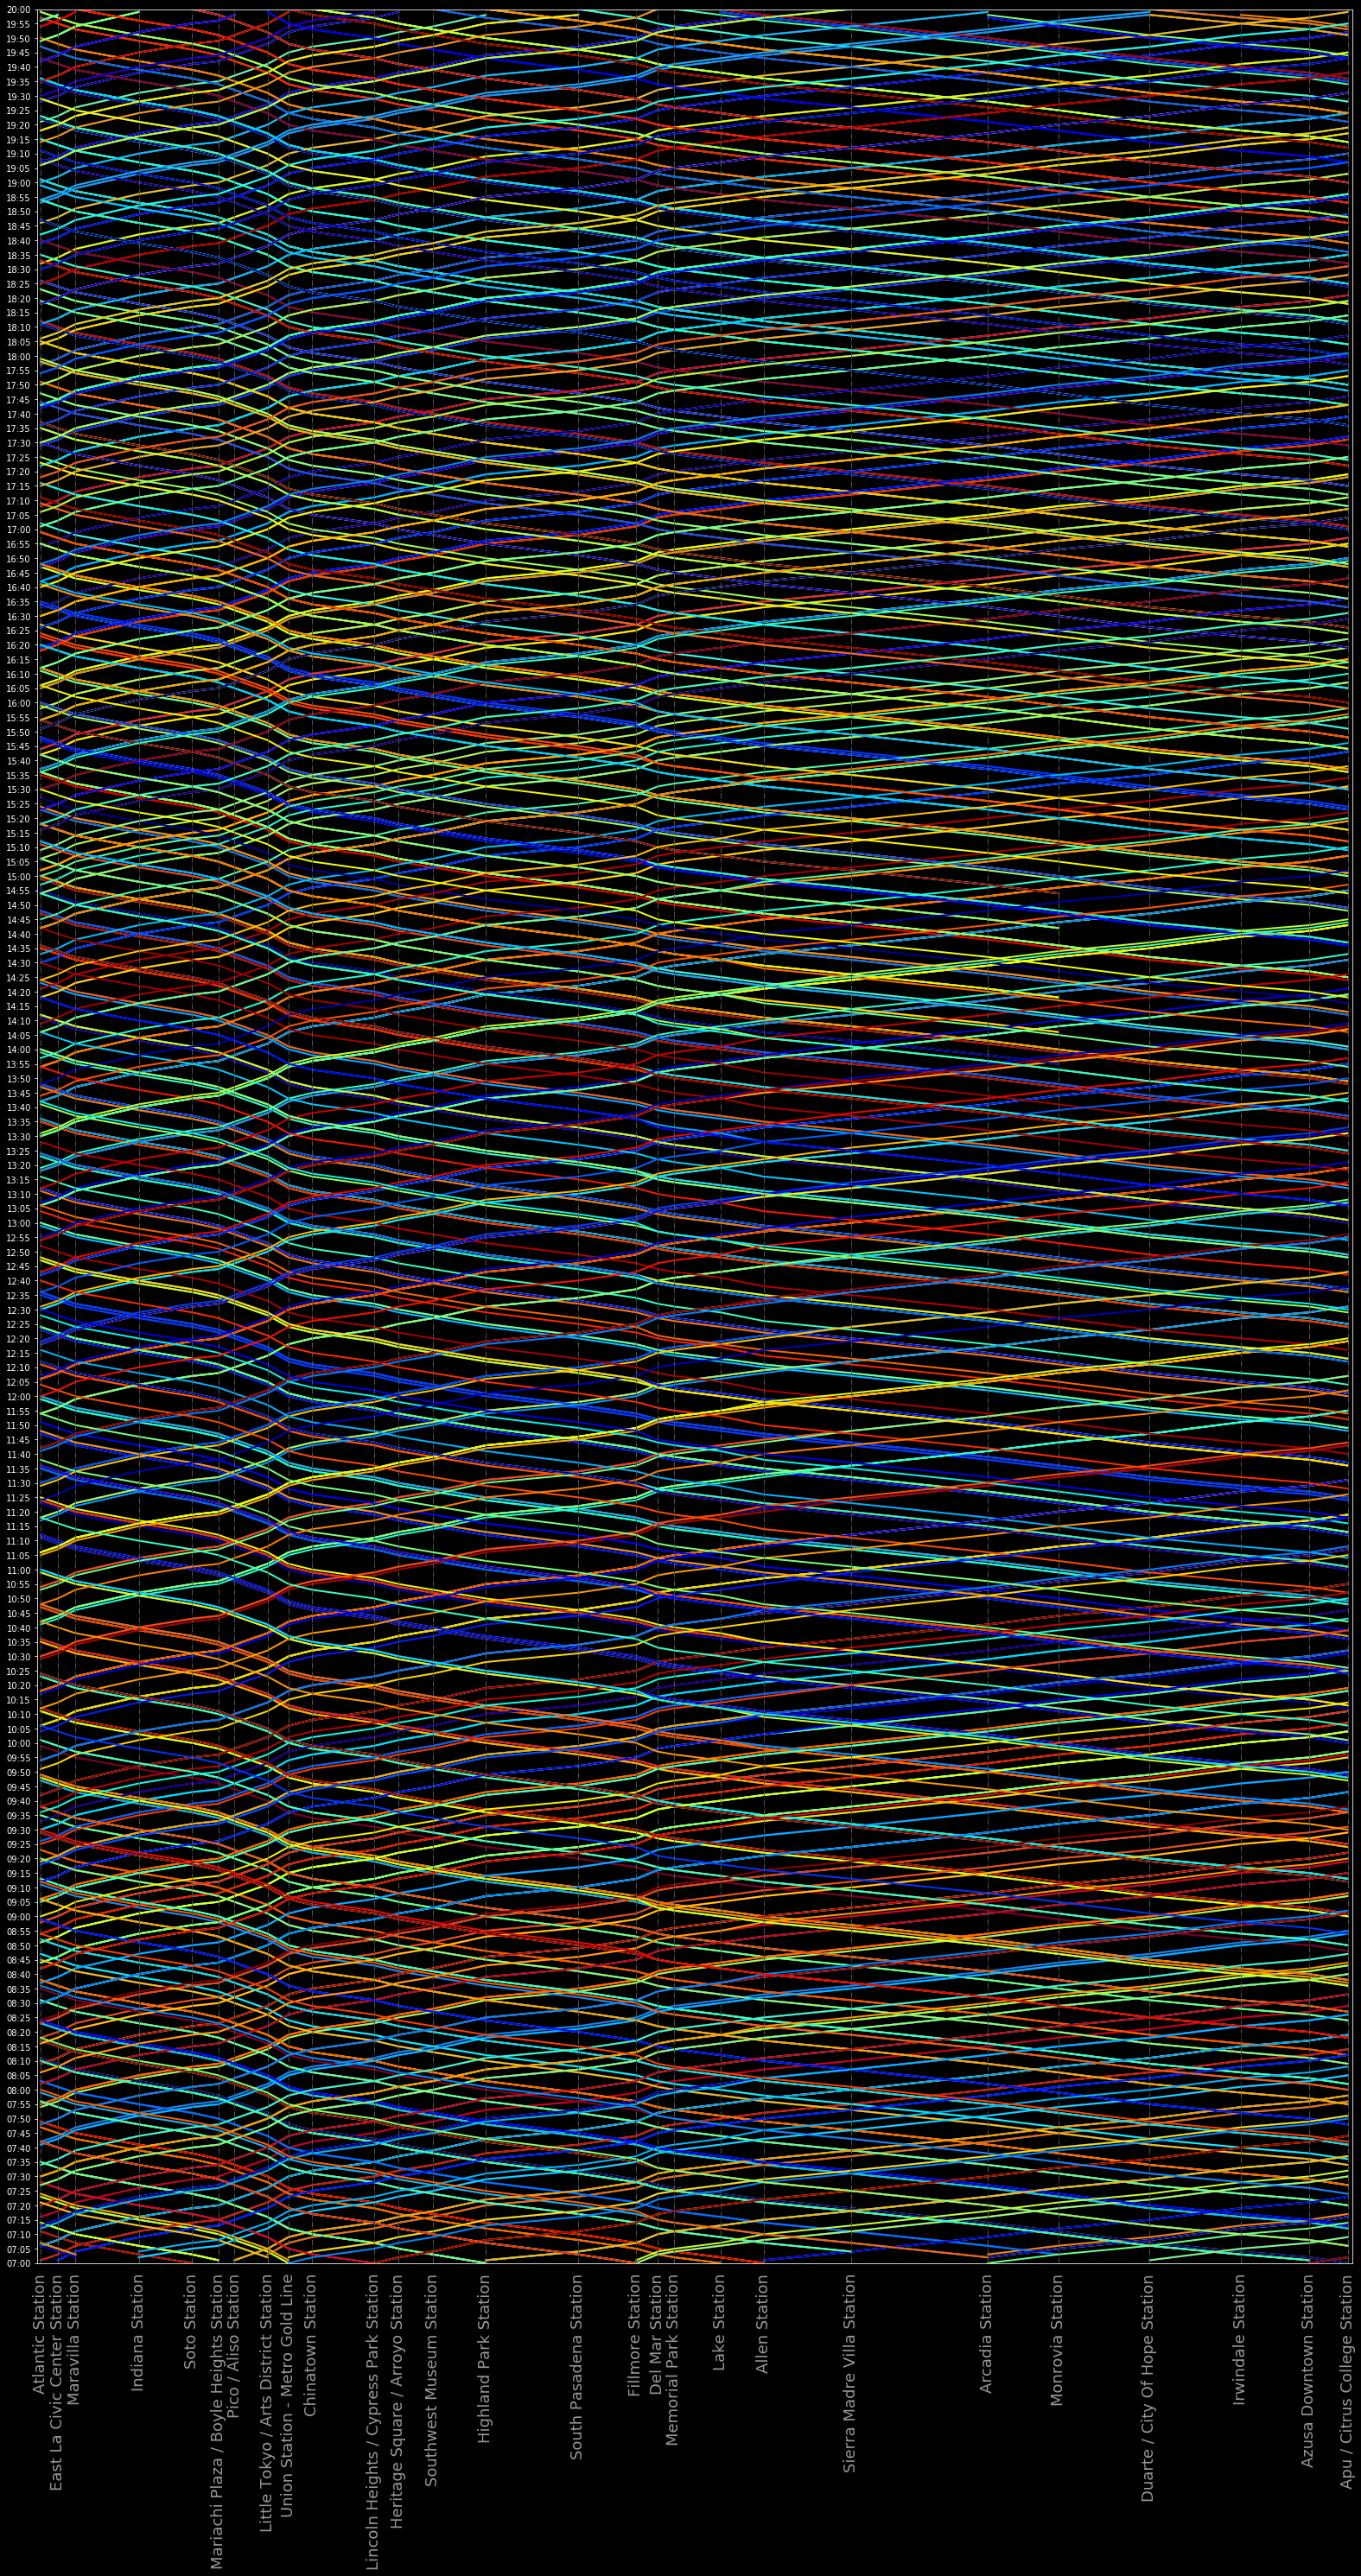

In [5]:
from App.classes.Visualizer import makeMarey, assignColorsToTrains

train_ids = list(analysis_window['trip_id'].unique())
colors = assignColorsToTrains(train_ids)
trips = analysis_window.groupby('trip_id')
makeMarey(gold.stations, trips, colors, pd.to_datetime(start_date), pd.to_datetime(end_date))